In [1]:
import import_ipynb
from APS_system_package.data_clean import train_data_clean, test_data_clean
from APS_system_package.preprocessing import *
from APS_system_package.logistic_regressions import *
from APS_system_package.performance_measure import *
import seaborn as sns
sns.set()
import time

importing Jupyter notebook from C:\Users\shuxg\Desktop\EIT\Proj 4 - Logistic\APS_system_package\data_clean.ipynb
importing Jupyter notebook from C:\Users\shuxg\Desktop\EIT\Proj 4 - Logistic\APS_system_package\preprocessing.ipynb
importing Jupyter notebook from C:\Users\shuxg\Desktop\EIT\Proj 4 - Logistic\APS_system_package\logistic_regressions.ipynb
importing Jupyter notebook from C:\Users\shuxg\Desktop\EIT\Proj 4 - Logistic\APS_system_package\performance_measure.ipynb


In [2]:
def add_distance(dataframe, dataframe2, distance_by = 'median', drop_relative_columns = True):
    # please import the dataframe after
    #        using train_data_clean and test_data_clean functions.
    # the first argument must be train dataframe
    # the second is for test dataframe
    rel_cols = ['ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009',
                'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009',
                'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009',
                'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009',
                'cn_000', 'cn_001', 'cn_002', 'cn_003', 'cn_004', 'cn_005', 'cn_006', 'cn_007', 'cn_008', 'cn_009',
                'cs_000', 'cs_001', 'cs_002', 'cs_003', 'cs_004', 'cs_005', 'cs_006', 'cs_007', 'cs_008', 'cs_009',
                'ee_000', 'ee_001', 'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008', 'ee_009']
    dataframe_pos = dataframe[dataframe['class'] == 1]
    dataframe_neg = dataframe[dataframe['class'] == 0]
    # MEAN DISTANCE
    if distance_by == 'mean' or distance_by == 'Mean':
        for i in range(7):
            mean_pos = dataframe_pos[rel_cols[i*10:(i+1)*10]].mean(axis = 0)
            mean_neg = dataframe_neg[rel_cols[i*10:(i+1)*10]].mean(axis = 0)
            
            # for training data frame
            dist_pos = np.sqrt(np.sum((dataframe[rel_cols[i*10:(i+1)*10]] - mean_pos)**2, axis = 1))
            dist_neg = np.sqrt(np.sum((dataframe[rel_cols[i*10:(i+1)*10]] - mean_neg)**2, axis = 1))
            
            # normalize
            normalizer = MaxMinNormalization(np.c_[dist_pos.to_numpy(), dist_neg.to_numpy()].ravel())
            dist_pos = normalizer.fit(dist_pos)
            dist_neg = normalizer.fit(dist_neg)
            
            s1 = 'dist_pos_' + rel_cols[i*10][0:2]
            s2 = 'dist_neg_' + rel_cols[i*10][0:2]
            dataframe[s1], dataframe[s2] = dist_pos, dist_neg

            # for testing data frame
            dist_pos = np.sqrt(np.sum((dataframe2[rel_cols[i*10:(i+1)*10]] - mean_pos)**2, axis = 1))
            dist_neg = np.sqrt(np.sum((dataframe2[rel_cols[i*10:(i+1)*10]] - mean_neg)**2, axis = 1))
            
            # normalize
            dist_pos = normalizer.fit(dist_pos)
            dist_neg = normalizer.fit(dist_neg)
            dataframe2[s1], dataframe2[s2] = dist_pos, dist_neg
    # MEDIAN DISTANCE
    elif distance_by == 'median' or distance_by == 'Median':
        for i in range(7):
            med_pos = dataframe_pos[rel_cols[i*10:(i+1)*10]].median(axis = 0)
            med_neg = dataframe_neg[rel_cols[i*10:(i+1)*10]].median(axis = 0)
            
            # for training data frame
            dist_pos = np.sqrt(np.sum((dataframe[rel_cols[i*10:(i+1)*10]] - med_pos)**2, axis = 1))
            dist_neg = np.sqrt(np.sum((dataframe[rel_cols[i*10:(i+1)*10]] - med_neg)**2, axis = 1))
            
            # normalize
            normalizer = MaxMinNormalization(np.c_[dist_pos.to_numpy(), dist_neg.to_numpy()].ravel())
            dist_pos = normalizer.fit(dist_pos)
            dist_neg = normalizer.fit(dist_neg)

            s1 = 'dist_pos_' + rel_cols[i*10][0:2]
            s2 = 'dist_neg_' + rel_cols[i*10][0:2]
            dataframe[s1], dataframe[s2] = dist_pos, dist_neg

            # for testing data frame
            dist_pos = np.sqrt(np.sum((dataframe2[rel_cols[i*10:(i+1)*10]] - med_pos)**2, axis = 1))
            dist_neg = np.sqrt(np.sum((dataframe2[rel_cols[i*10:(i+1)*10]] - med_neg)**2, axis = 1))
            
            # normalize
            dist_pos = normalizer.fit(dist_pos)
            dist_neg = normalizer.fit(dist_neg)
            dataframe2[s1], dataframe2[s2] = dist_pos, dist_neg
    else:
        pass
    if drop_relative_columns:
        dataframe = dataframe.drop(rel_cols, axis = 1)
        dataframe2 = dataframe2.drop(rel_cols, axis = 1)
    return dataframe, dataframe2

## load train and test dataset

In [3]:
df_trn = train_data_clean('train.csv', impute = 'median')
df_val = test_data_clean('test.csv', 'train.csv', impute = 'median')

Nan: 0
Nan: 0
Nan: 0


**add distance**

In [4]:
df_trn, df_val = add_distance(df_trn, df_val, distance_by = 'median', drop_relative_columns = True)

In [5]:
df_trn.shape

(60000, 115)

**split based on class**

In [6]:
df_trn_pos = df_trn[df_trn['class'] == 1]
df_trn_neg = df_trn[df_trn['class'] == 0]
cols = df_trn_pos.columns[1:]

In [7]:
df_trn_neg.head(3)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ah_000,ai_000,aj_000,...,dist_pos_az,dist_neg_az,dist_pos_ba,dist_neg_ba,dist_pos_cn,dist_neg_cn,dist_pos_cs,dist_neg_cs,dist_pos_ee,dist_neg_ee
1000,0,76698.0,0.0,2.130706e+09,280.0,0.0,0.0,2551696.0,0.0,0.0,...,0.026158,0.010706,0.040383,0.007920,0.038833,0.012107,0.034267,0.007587,0.033017,0.009087
1001,0,33058.0,0.0,0.000000e+00,124.0,0.0,0.0,1393352.0,0.0,68.0,...,0.033057,0.003516,0.044747,0.002790,0.042342,0.003860,0.039807,0.001875,0.038150,0.003130
1002,0,41040.0,0.0,2.280000e+02,100.0,0.0,0.0,1234132.0,0.0,0.0,...,0.034952,0.003712,0.045889,0.001327,0.042731,0.003416,0.040225,0.001572,0.039823,0.001999


**recombine pos and neg**

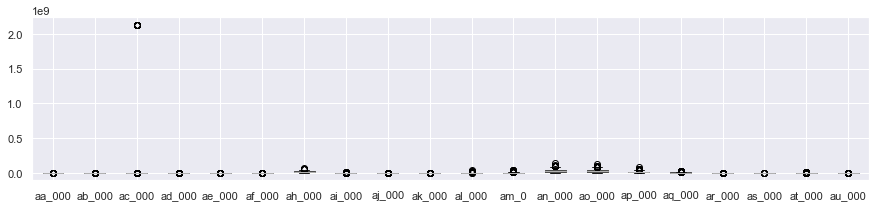

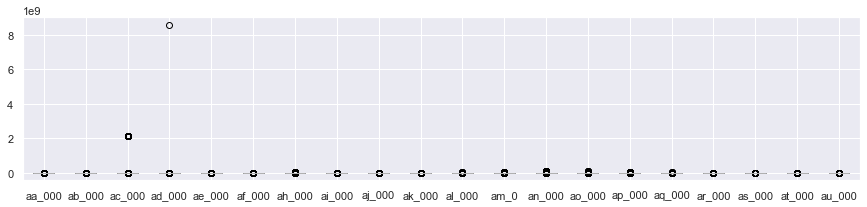

In [7]:
plt.figure(figsize = (15, 3))
df_trn_pos.boxplot(cols.tolist()[0:20])
plt.figure(figsize = (15, 3))
df_trn_neg.boxplot(cols.tolist()[0:20])

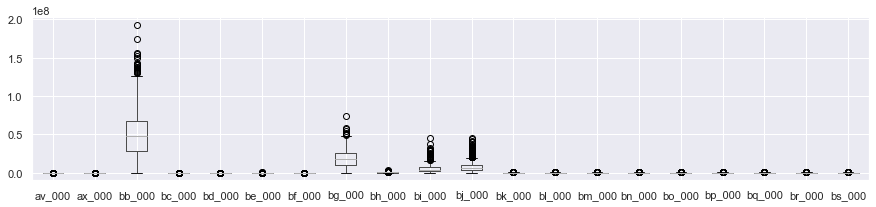

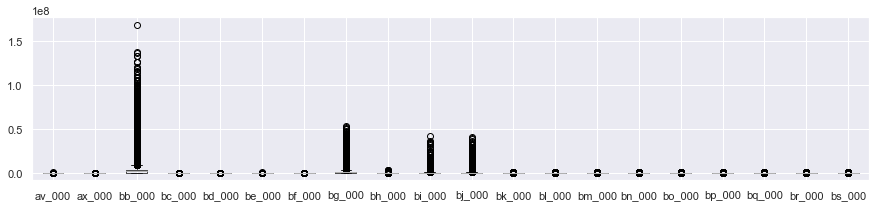

In [8]:
a, b = 20, 40
plt.figure(figsize = (15, 3))
df_trn_pos.boxplot(cols.tolist()[a:b])
plt.figure(figsize = (15, 3))
df_trn_neg.boxplot(cols.tolist()[a:b])

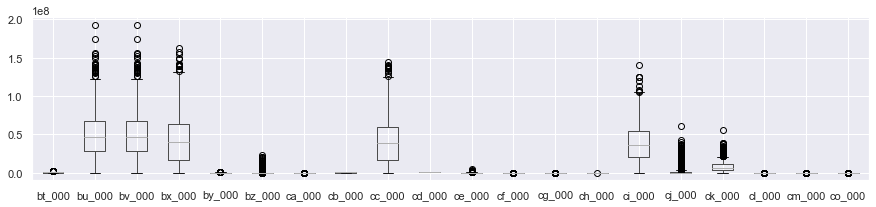

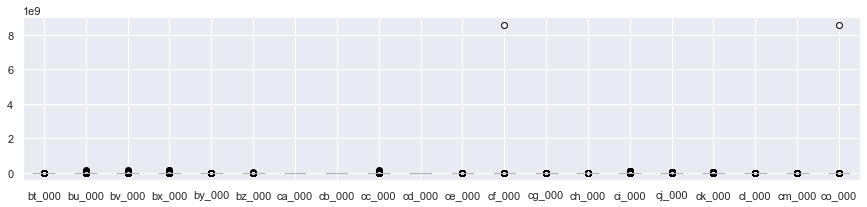

In [9]:
a, b = 40, 60
plt.figure(figsize = (15, 3))
df_trn_pos.boxplot(cols.tolist()[a:b])
plt.figure(figsize = (15, 3))
df_trn_neg.boxplot(cols.tolist()[a:b])

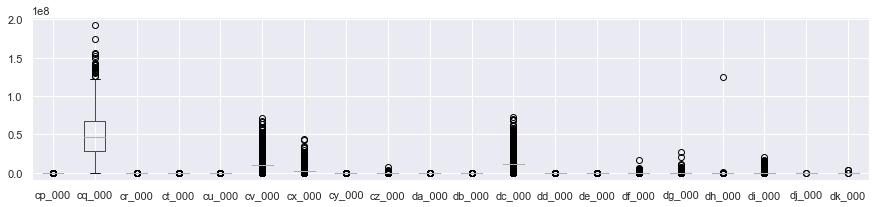

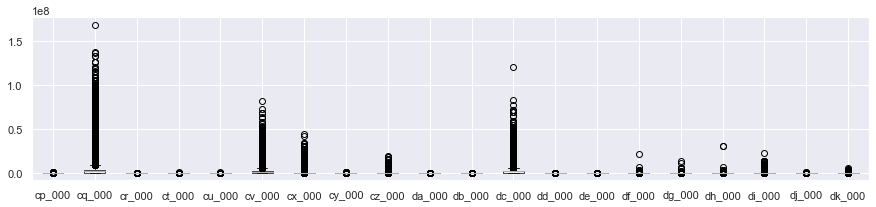

In [10]:
a, b = 60, 80
plt.figure(figsize = (15, 3))
df_trn_pos.boxplot(cols.tolist()[a:b])
plt.figure(figsize = (15, 3))
df_trn_neg.boxplot(cols.tolist()[a:b])

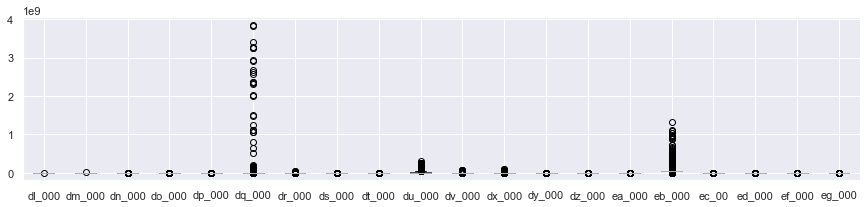

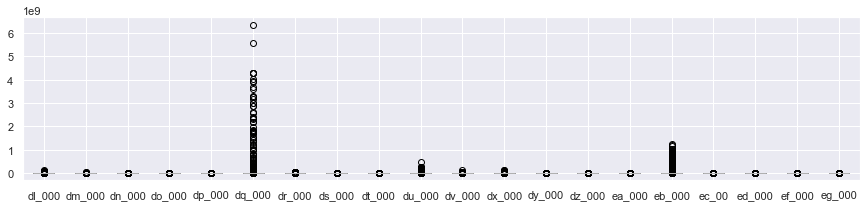

In [12]:
a, b = 80, 100
plt.figure(figsize = (15, 3))
df_trn_pos.boxplot(cols.tolist()[a:b])
plt.figure(figsize = (15, 3))
df_trn_neg.boxplot(cols.tolist()[a:b])

Text(0.5, 1.0, 'Negative Case')

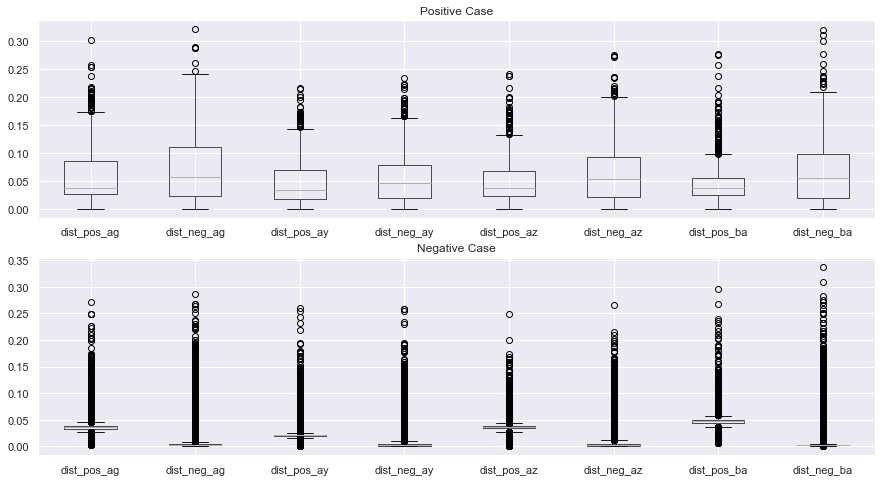

In [14]:
a, b = 100, 108
plt.figure(figsize = (15, 8))
plt.subplot(211)
df_trn_pos.boxplot(cols.tolist()[a:b])
plt.title('Positive Case', fontsize = 12)
plt.subplot(212)
df_trn_neg.boxplot(cols.tolist()[a:b])
plt.title('Negative Case', fontsize = 12)

Text(0.5, 1.0, 'Negative Case')

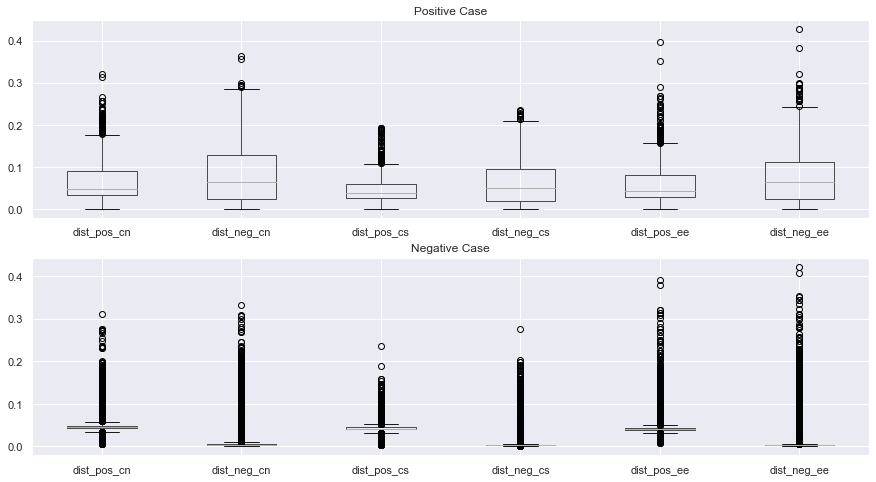

In [15]:
a, b = 108, 115
plt.figure(figsize = (15, 8))
plt.subplot(211)
df_trn_pos.boxplot(cols.tolist()[a:b])
plt.title('Positive Case', fontsize = 12)
plt.subplot(212)
df_trn_neg.boxplot(cols.tolist()[a:b])
plt.title('Negative Case', fontsize = 12)

**remove outliars**

In [7]:
neg_cols   = ['ad_000', 'cf_000', 'co_000', 'dist_pos_ag']
conditions = [8e9, 8e9, 8e9, 0.8]
for i in range(len(conditions)):
#     df_trn_neg = df_trn_neg[df_trn_neg[neg_cols[i]] < conditions[i]]
    print(df_trn_neg[df_trn_neg[neg_cols[i]] >= conditions[i]])
df_trn_neg.shape

       class  aa_000  ab_000  ac_000        ad_000  ae_000  af_000    ah_000  \
46185      0  2528.0     0.0   122.0  8.584298e+09     0.0     0.0  101048.0   

       ai_000  aj_000  ...  dist_pos_az  dist_neg_az  dist_pos_ba  \
46185     0.0     0.0  ...     0.037083     0.000646     0.049445   

       dist_neg_ba  dist_pos_cn  dist_neg_cn  dist_pos_cs  dist_neg_cs  \
46185     0.002475     0.048195     0.002857     0.044514     0.002946   

       dist_pos_ee  dist_neg_ee  
46185     0.043084     0.002211  

[1 rows x 115 columns]
       class  aa_000  ab_000  ac_000        ad_000  ae_000  af_000    ah_000  \
46185      0  2528.0     0.0   122.0  8.584298e+09     0.0     0.0  101048.0   

       ai_000  aj_000  ...  dist_pos_az  dist_neg_az  dist_pos_ba  \
46185     0.0     0.0  ...     0.037083     0.000646     0.049445   

       dist_neg_ba  dist_pos_cn  dist_neg_cn  dist_pos_cs  dist_neg_cs  \
46185     0.002475     0.048195     0.002857     0.044514     0.002946   

       dis

(59000, 115)

**save featured data**

In [17]:
df_trn = df_trn_pos.append(df_trn_neg, ignore_index = False)

In [18]:
df_trn.shape, df_val.shape

((59998, 115), (16000, 115))

In [19]:
df_trn.to_csv('cleaned_train_addDistance.csv', index = False)
df_val.to_csv('cleaned_test_addDistance.csv', index = False)